# Import Libraries #  

In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np

#visualization
import matplotlib.pyplot as plt


#tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# image preprocessing # 

In [2]:
loc2 = '/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set'

categories = {
    'colon_aca': 0,  # Colon adenocarcinoma
    'colon_n': 1,    # Normal colon
    'lung_aca': 2,   # Lung adenocarcinoma
    'lung_n': 3,     # Normal lung
    'lung_scc': 4    # Lung squamous cell carcinoma
}

# Prepare lists to store the features (image data) and labels
features = []
labels = []

# Loop through the main folders (colon_image_sets and lung_image_sets)
for folder in ['colon_image_sets', 'lung_image_sets']:
    sub_dir = os.path.join(loc2, folder)
    
    # Loop through each class subfolder inside the main folder
    for class_name in os.listdir(sub_dir):
        class_dir = os.path.join(sub_dir, class_name)
        
        # Loop through each image in the class folder
        for img in tqdm(os.listdir(class_dir), desc=f'Processing {class_name}'):
            img_path = os.path.join(class_dir, img)
            
            # Read the image and resize it to 70x70 pixels
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (70, 70))
            
            # Append the preprocessed image and its corresponding label
            features.append(img_array)  # Add the image to the features list
            labels.append(categories[class_name])  # Add the label based on class

# Convert the features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Normalize the pixel values of the images to be between 0 and 1
features = features.astype('float32') / 255.0

# Print summary of the data
print(f'Total images processed: {len(features)}')
print(f'Total labels assigned: {len(labels)}')

Processing lung_n: 100%|██████████| 5000/5000 [01:25<00:00, 58.16it/s]


Total images processed: 25000
Total labels assigned: 25000


In [3]:
X = np.array(features)
print(X.shape)

(25000, 70, 70, 3)


In [4]:
Y = np.array(labels)
print(Y.shape)

(25000,)


# Splitting The Dataset # 

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
xtrain = xtrain/xtrain.max()
xtest = xtest/xtest.max()

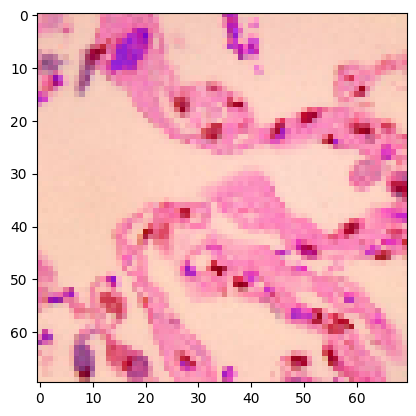

In [7]:
plt.imshow(xtrain[120])
plt.show()

# Building the model # 

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32 ,(3,3) , padding = 'same' , input_shape = (70,70,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(512 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256 , activation='relu' ))
model.add(layers.Dense(5, activation='softmax') )

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 70, 70, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 70, 70, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 35, 35, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,094,405 (7.99 MB)

 Trainable params: 2,094,405 (7.99 MB)

 Non-trainable params: 0 (0.00 B)

# compiling the model # 

In [10]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Trainng the model # 

In [11]:
model.fit(xtrain,ytrain,
          epochs=20,
          validation_data=(xtest,ytest),shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 291ms/step - accuracy: 0.6031 - loss: 0.8389 - val_accuracy: 0.8652 - val_loss: 0.3160
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.8778 - loss: 0.2992 - val_accuracy: 0.9300 - val_loss: 0.1887
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 260ms/step - accuracy: 0.9267 - loss: 0.1829 - val_accuracy: 0.9498 - val_loss: 0.1279
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.9530 - loss: 0.1190 - val_accuracy: 0.9448 - val_loss: 0.1518
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.9570 - loss: 0.1119 - val_accuracy: 0.9588 - val_loss: 0.1055
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 266ms/step - accuracy: 0.9650 - loss: 0.0914 - val_accuracy: 0.9752 - val_loss: 0.0646
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.9741 - loss: 0.0657 - val_accuracy: 0.9730 - val_loss: 0.0873
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.9811 -

# **Model Evaluation** # 

In [12]:
model.evaluate(xtrain,ytrain)

625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.9997 - loss: 8.3662e-04


[0.0011112326756119728, 0.9996500015258789]

In [13]:
model.evaluate(xtest,ytest)

157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9850 - loss: 0.0624


[0.056571148335933685, 0.9883999824523926]

In [14]:
model.save('model.h5')